In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
plt.close("all")
%matplotlib notebook

In [4]:
import numpy as np

In [5]:
from scipy import stats

In [6]:
df = pd.read_excel("0706_1000Microns.xlsx")
df

,Unnamed: 0,Cab.Bridge,Voltage steps,V(PZT),V(PZT).1,Voltage_D,Voltage mean,real_V (after entering code),M-E Sensor,ME_D,ME_A_dis,Fringes,Fringe_D,fringe_A_dis,Time,Notes
0,NaN,(bit),NaN,(monitor)(before code),(after code),NaN,NaN,NaN,(microns),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Balance C-Bridge: $H:Z^,31463,NaN,NaN,NaN,NaN,NaN,NaN,1166.73,NaN,NaN,NaN,NaN,NaN,02:38:00,NaN
2,$H:S:31463:2:33137:70^,33137,1674.0,1.032,4.48,NaN,NaN,44.80,1195.56,28.83,28.83,56.0,17.7184,17.7184,02:44:00,NaN
3,NaN,33537,400.0,4.42,5.33,0.850,NaN,53.30,1203.55,7.99,36.82,22.0,6.9608,24.6792,02:47:00,NaN
4,NaN,33937,400.0,5.26,6.16,0.830,NaN,61.60,1211.59,8.04,44.86,21.0,6.6444,31.3236,02:50:00,NaN
5,NaN,34337,400.0,NaN,6.96,0.800,NaN,69.60,1219.66,8.07,52.93,19.0,6.0116,37.3352,02:51:00,NaN
6,NaN,34737,400.0,6.88,7.82,0.860,NaN,78.20,1227.76,8.10,61.03,19.0,6.0116,43.3468,02:53:00,NaN
7,NaN,35137,400.0,7.74,8.68,0.860,NaN,86.80,1235.98,8.22,69.25,18.0,5.6952,49.0420,02:55:00,NaN
8,NaN,35537,400.0,8.56,9.53,0.850,NaN,95.30,1244.24,8.26,77.51,19.0,6.0116,55.0536,02:57:00,NaN
9,NaN,35137,-400.0,9.45,7.9,-1.630,NaN,79.00,1235.98,-8.26,69.25,-26.0,-8.2264,46.8272,02:59:00,NaN


In [7]:
ME_A_dis = df["ME_A_dis"][2:23]
print(ME_A_dis)

2     28.83
3     36.82
4     44.86
5     52.93
6     61.03
7     69.25
8     77.51
9     69.25
10    61.05
11    52.95
12    44.89
13    36.85
14    28.85
15    21.57
16    14.78
17     8.01
18     1.27
19    -5.43
20   -12.10
21   -18.75
22   -25.34
Name: ME_A_dis, dtype: float64


In [8]:
fringe_A_dis = df["fringe_A_dis"][2:23]
print(fringe_A_dis)

2     17.7184
3     24.6792
4     31.3236
5     37.3352
6     43.3468
7     49.0420
8     55.0536
9     46.8272
10    38.9172
11    31.0072
12    23.7300
13    15.5036
14     7.9100
15     0.6328
16    -6.0116
17   -11.7068
18   -18.3512
19   -24.6792
20   -31.3236
21   -37.6516
22   -43.9796
Name: fringe_A_dis, dtype: float64


In [9]:
real_V = df["real_V (after entering code)"][2:23]
print(real_V)

2     44.80
3     53.30
4     61.60
5     69.60
6     78.20
7     86.80
8     95.30
9     79.00
10    66.20
11    54.80
12    44.60
13    35.05
14    26.26
15    18.69
16    11.93
17     5.38
18    -0.73
19    -6.55
20   -12.08
21   -17.33
22   -22.27
Name: real_V (after entering code), dtype: float64


In [10]:
x = fringe_A_dis
y = ME_A_dis

In [11]:
info = stats.linregress(x,y)
print(info)

LinregressResult(slope=1.0015899051667712, intercept=19.017161893148735, rvalue=0.9942207666921864, pvalue=6.99424304404421e-20, stderr=0.024811443910805555, intercept_stderr=0.795742189211767)


<IPython.core.display.Javascript object>


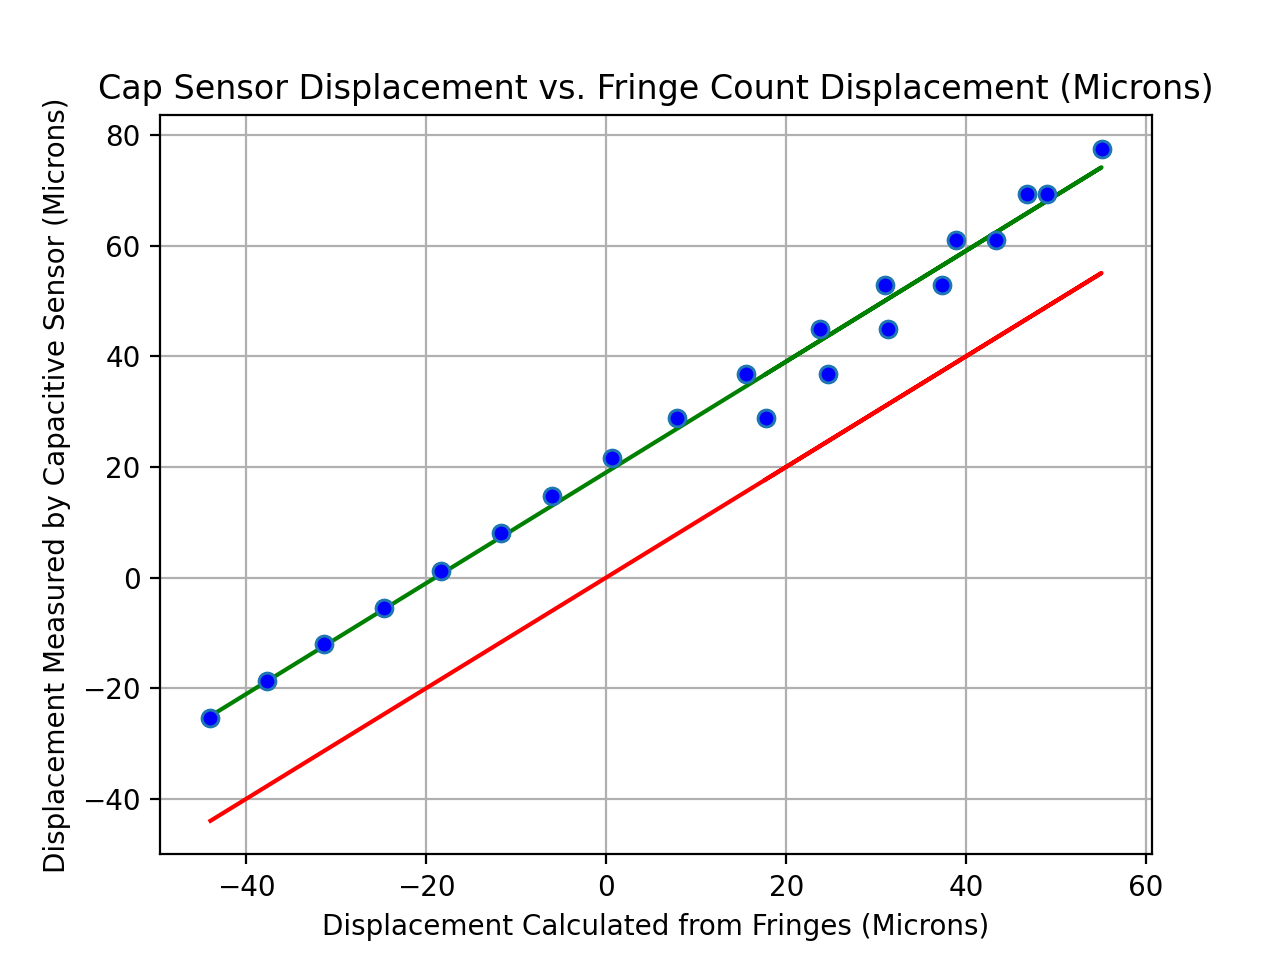

<function matplotlib.pyplot.show(block=None)>

In [12]:

xerror = np.full_like(x,0.6)
yerror = np.full_like(y,0)


plt.scatter(x,y)

plt.plot(x,x*info.slope+info.intercept,c = "green")

plt.plot(x,x,c = "red")

plt.errorbar(x,y,xerr=xerror,yerr=yerror,fmt = 'o',mfc = 'blue')

plt.xlabel('Displacement Calculated from Fringes (Microns)')
plt.ylabel('Displacement Measured by Capacitive Sensor (Microns)')

plt.title('Cap Sensor Displacement vs. Fringe Count Displacement (Microns)')




plt.grid()
plt.show

In [13]:
downscan_V = df["real_V (after entering code)"][17:23]
print(downscan_V)

17     5.38
18    -0.73
19    -6.55
20   -12.08
21   -17.33
22   -22.27
Name: real_V (after entering code), dtype: float64


<IPython.core.display.Javascript object>


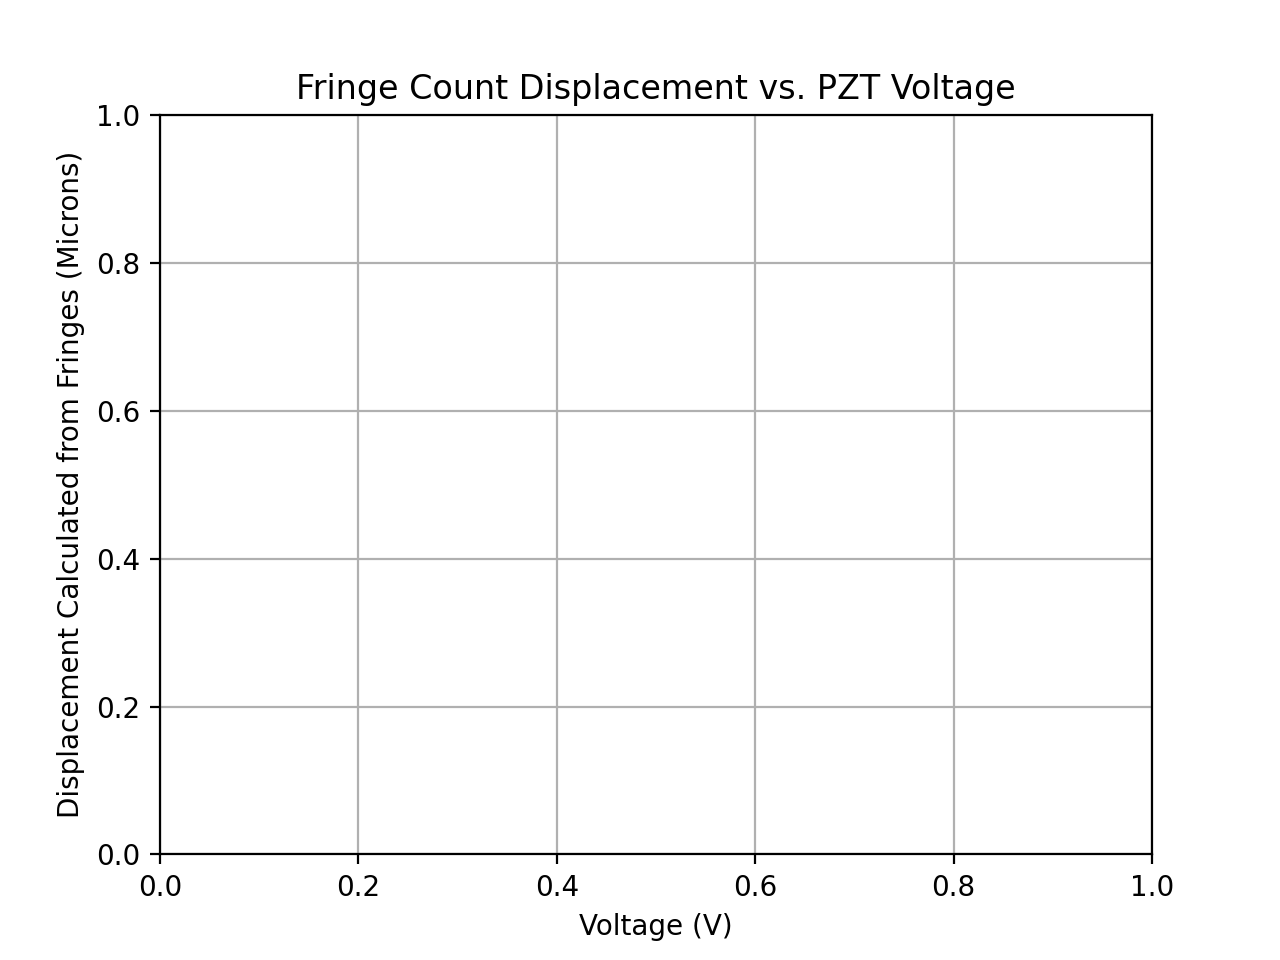

<function matplotlib.pyplot.show(block=None)>

In [15]:
plt.close("all")
x = real_V
y = fringe_A_dis

plt.scatter(x,y)

plt.xlabel('Voltage (V)')
plt.ylabel('Displacement Calculated from Fringes (Microns)')

plt.title('Fringe Count Displacement vs. PZT Voltage')

plt.grid()
plt.show